# Chapter 8 - Nonlinear Regression

- [Load Datasets](#Load-Datasets)
- [Nonlinear Regression](#Nonlinear-Regression)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
import os
os.getcwd()         # returns a string representing the current working directory.

'C:\\Users\\ellyj\\Desktop\\3-1\\계량경제학'

In [4]:
data_path = "C:/Users/ellyj/Desktop/3-1/계량경제학/python"

## Load Datasets
Datasets available on the course website

In [5]:
caschool = pd.read_excel(f"{data_path}/Data/caschool.xlsx")
caschool.head()

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


## Nonlinear Regression

In [6]:
caschool.corr()

,Observation Number,dist_cod,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
Observation Number,1.000000,0.131414,-0.162980,-0.155644,-0.644250,-0.848417,-0.089669,0.946447,0.188862,0.115293,-0.176755,0.641437,-0.617446,0.933002,0.922737
dist_cod,0.131414,1.000000,-0.033569,-0.031524,-0.161727,-0.108032,-0.020999,0.114170,0.042980,0.049172,-0.058951,0.103910,-0.026967,0.106576,0.117713
enrl_tot,-0.162980,-0.033569,1.000000,0.997116,0.090161,0.129234,0.928882,-0.153988,-0.212718,-0.112285,0.298481,0.028392,0.354879,-0.188399,-0.110889
teachers,-0.155644,-0.031524,0.997116,1.000000,0.092645,0.124296,0.937242,-0.144857,-0.205083,-0.095195,0.264641,0.043007,0.351421,-0.179109,-0.102296
calw_pct,-0.644250,-0.161727,0.090161,0.092645,1.000000,0.739422,0.059160,-0.626853,-0.151968,0.067889,0.018276,-0.512651,0.319576,-0.611847,-0.617691
meal_pct,-0.848417,-0.108032,0.129234,0.124296,0.739422,1.000000,0.061386,-0.868772,-0.203953,-0.061039,0.135203,-0.684440,0.653061,-0.878808,-0.823015
computer,-0.089669,-0.020999,0.928882,0.937242,0.059160,0.061386,1.000000,-0.073736,-0.042422,-0.071311,0.233826,0.094343,0.291339,-0.109005,-0.032950
testscr,0.946447,0.114170,-0.153988,-0.144857,-0.626853,-0.868772,-0.073736,1.000000,0.270703,0.191273,-0.226363,0.712431,-0.644124,0.981882,0.979143
comp_stu,0.188862,0.042980,-0.212718,-0.205083,-0.151968,-0.203953,-0.042422,0.270703,1.000000,0.286560,-0.307070,0.194806,-0.251007,0.281158,0.248589
expn_stu,0.115293,0.049172,-0.112285,-0.095195,0.067889,-0.061039,-0.071311,0.191273,0.286560,1.000000,-0.619982,0.314484,-0.071396,0.217927,0.154989


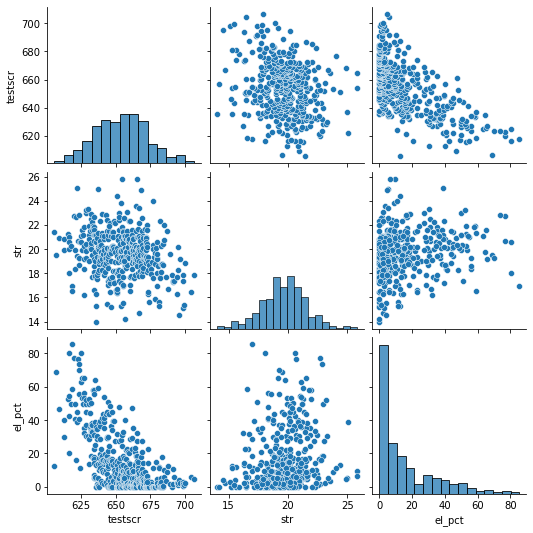

In [7]:
sns.pairplot(caschool[['testscr','str','el_pct']]);

### Nonlinear model with single regressor: polynomial regression

In [8]:
caschool['avginc2'] = caschool.avginc**2
caschool['avginc3'] = caschool.avginc**3
caschool.head(3)

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr,avginc2,avginc3
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000,514.836124,11681.631934
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024,96.510983,948.123932
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024,80.604478,723.666982


In [9]:
nonlinear_est2 = smf.ols('testscr ~ avginc + avginc2', caschool).fit(cov_type='HC0')
print(nonlinear_est2.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     431.6
Date:                Sat, 20 Aug 2022   Prob (F-statistic):          2.69e-102
Time:                        13:04:52   Log-Likelihood:                -1662.7
No. Observations:                 420   AIC:                             3331.
Df Residuals:                     417   BIC:                             3344.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    607.3017      2.891    210.039      0.0

In [10]:
nonlinear_est3 = smf.ols('testscr ~ avginc + avginc2 + avginc3', caschool).fit(cov_type='HC0')
print(nonlinear_est3.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     272.8
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           7.53e-98
Time:                        13:04:55   Log-Likelihood:                -1661.6
No. Observations:                 420   AIC:                             3331.
Df Residuals:                     416   BIC:                             3347.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    600.0790      5.078    118.179      0.0

### Nonlinear model with multiple regressors: polynomial regression

In [11]:
nonlinear_est4 = smf.ols('testscr ~ avginc + avginc2 + avginc3 + el_pct', caschool).fit(cov_type='HC0')
print(nonlinear_est4.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     376.4
Date:                Sat, 20 Aug 2022   Prob (F-statistic):          1.38e-136
Time:                        13:04:58   Log-Likelihood:                -1563.0
No. Observations:                 420   AIC:                             3136.
Df Residuals:                     415   BIC:                             3156.
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    634.9420      4.771    133.088      0.0

### Nonlinear model with single regressor: linear-log regression

In [12]:
caschool['logavginc'] = np.log(caschool.avginc)
caschool.head(3)

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,...,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr,avginc2,avginc3,logavginc
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,...,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000,514.836124,11681.631934,3.121924
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,...,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024,96.510983,948.123932,2.284828
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,...,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024,80.604478,723.666982,2.194777


In [13]:
linear_log_est = smf.ols('testscr ~ logavginc', caschool).fit(cov_type='HC0')
print(linear_log_est.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     682.9
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           6.18e-90
Time:                        13:05:03   Log-Likelihood:                -1659.7
No. Observations:                 420   AIC:                             3323.
Df Residuals:                     418   BIC:                             3331.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    557.8323      3.831    145.618      0.0

### Interactions Between Independent Variables: two binary regressors

In [14]:
caschool['Hi_str'] = np.where(caschool['str'] >= 20, 1, 0)
caschool['Hi_el_pct'] = np.where(caschool['el_pct'] >= 10, 1, 0)
caschool.head()

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,...,str,avginc,el_pct,read_scr,math_scr,avginc2,avginc3,logavginc,Hi_str,Hi_el_pct
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,...,17.889910,22.690001,0.000000,691.599976,690.000000,514.836124,11681.631934,3.121924,0,0
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,...,21.524664,9.824000,4.583333,660.500000,661.900024,96.510983,948.123932,2.284828,1,0
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,...,18.697226,8.978000,30.000002,636.299988,650.900024,80.604478,723.666982,2.194777,0,1
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,...,17.357143,8.978000,0.000000,651.900024,643.500000,80.604478,723.666982,2.194777,0,0
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,...,18.671329,9.080333,13.857677,641.799988,639.900024,82.452443,748.695619,2.206111,0,1


In [15]:
interact_est1 = smf.ols('testscr ~ Hi_str + Hi_el_pct + Hi_str*Hi_el_pct', caschool).fit(cov_type='HC0')
print(interact_est1.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     60.77
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           1.33e-32
Time:                        13:05:05   Log-Likelihood:                -1759.7
No. Observations:                 420   AIC:                             3527.
Df Residuals:                     416   BIC:                             3544.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          664.1433      1.381  

### Interactions Between Independent Variables: continuous and binary regressors

In [16]:
interact_est2 = smf.ols('testscr ~ str + Hi_el_pct + str*Hi_el_pct', caschool).fit(cov_type='HC0')
print(interact_est2.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     64.28
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           3.61e-34
Time:                        13:05:08   Log-Likelihood:                -1755.3
No. Observations:                 420   AIC:                             3519.
Df Residuals:                     416   BIC:                             3535.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       682.2458     11.811     57.763

### Interactions Between Independent Variables: two continuous regressors

In [17]:
interact_est3 = smf.ols('testscr ~ str + el_pct + str*el_pct', caschool).fit(cov_type='HC0')
print(interact_est3.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     156.5
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           6.60e-68
Time:                        13:05:12   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3441.
Df Residuals:                     416   BIC:                             3457.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    686.3385     11.703     58.645      0.0